In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
#Graph for total water volume by phase
#group data by totals
#create summary tables of the plots 
#set parameters, will be added to function at later date
directory = r"H:\Englishman\ACO_20_3012\analysis\swe_tables"
parameter = "zbin"
wshed = "Englishman"
subbasin = "Arrowsmith"
file = subbasin + "_elevation.csv"
print(file)

totalwatervol_title = "Total Water Volume, 2020 \n" + wshed + " watershed: " + subbasin 
out_directory = r"H:\Englishman\ACO_20_3012\analysis\graphs"
totalwatervol_output = "Total Water Volume" + wshed + "_" + subbasin + ".png"

os.chdir(directory)
df = pd.read_csv(file)
print(df)


Arrowsmith_elevation.csv
    zbin   water_volume       SWE_mm  phase    date
0    900   86574.980000   100.812655      1   3-Mar
1   1000  110156.600000   201.296334      1   3-Mar
2   1100  268350.780000   270.704560      1   3-Mar
3   1200  449819.510000   409.742214      1   3-Mar
4   1300  364936.010000   573.982862      1   3-Mar
5   1400  286751.570000   697.855376      1   3-Mar
6   1500  262296.870000   731.161495      1   3-Mar
7   1600  113337.900000   743.043433      1   3-Mar
8    900  256952.850000   299.209971      2   6-Apr
9   1000  167849.000000   306.721420      2   6-Apr
10  1100  469721.910000   473.841968      2   6-Apr
11  1200  755767.540000   688.431378      2   6-Apr
12  1300  583239.210000   917.337021      2   6-Apr
13  1400  438818.900000  1067.935334      2   6-Apr
14  1500  397193.820000  1107.191330      2   6-Apr
15  1600  170412.390000  1117.223863      2   6-Apr
16   900     628.442929     0.731793      3   7-May
17  1000    1861.786512     3.402164   

In [3]:
sum = df.groupby(
    ["phase"]).agg({  
    "water_volume": "sum",
}).round(2).reset_index()
display(sum)
#sum["Phase"]= sum["Phase"].astype(str)
#name = "summary_" + name
#sum.to_csv(name,index=True)

,phase,water_volume
0,1,1942224.22
1,2,3239955.62
2,3,1531672.95
3,4,567660.36
4,5,133768.82


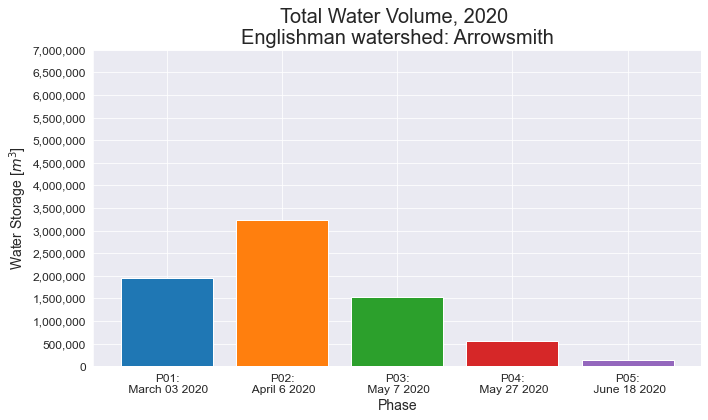

In [4]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
color_list = sns.color_palette()[:5]
plt.bar(sum["phase"], sum["water_volume"], color=color_list)

#set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.set_title(totalwatervol_title, fontsize = 20)
# including upper limits



#ax.yaxis.set_ticks(np.arange(0, 1700, 200))

ax.set_ylabel("Water Storage [$m^{3}$]", fontsize=14)
ax.set_xlabel("Phase", fontsize=14)
labels2021 = ["P01:\n March 03 2020", "P02:\n April 6 2020", "P03:\n May 7 2020", "P04:\n May 27 2020", "P05:\n June 18 2020"]
plt.xticks(sum.phase, fontsize=12)
ax.set_xticklabels(labels2021)



#errorbars
#plt.vlines(sum["Phase"],sum["lower_wv"],sum["upper_wv"],color="black")
plt.yticks(np.arange(0, 7500000, step=500000),fontsize=12)
ax.set_yticklabels(["0","500,000","1,000,000","1,500,000", "2,000,000", "2,500,000", "3,000,000", "3,500,000", "4,000,000", "4,500,000", "5,000,000", "5,500,000", "6,000,000","6,500,000","7,000,000"])

os.chdir(out_directory)
plt.savefig(totalwatervol_output)
plt.show()